## 1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Read dataset

In [3]:
df = pd.read_csv('diabetes.csv')
df.head()

,Diabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,No,Yes,Yes,Yes,40,1,No,No,0,No,...,Yes,No,poor,18,15,Yes,female,9,4,3
1,No,No,No,No,25,1,No,No,1,No,...,No,Yes,good,0,0,No,female,7,6,1
2,No,Yes,Yes,Yes,28,0,No,No,0,Yes,...,Yes,Yes,poor,30,30,Yes,female,9,4,8
3,No,Yes,No,Yes,27,0,No,No,1,Yes,...,Yes,No,very good,0,0,No,female,11,3,6
4,No,Yes,Yes,Yes,24,0,No,No,1,Yes,...,Yes,No,very good,3,0,No,female,11,5,4


In [4]:
df.shape

(253680, 22)

In [5]:
df.columns

Index(['Diabetes', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

There is 253.680 records in our data and 21 features with 1 target variable

## 3. Check overview of our data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Diabetes              253680 non-null  object
 1   HighBP                253680 non-null  object
 2   HighChol              253680 non-null  object
 3   CholCheck             253680 non-null  object
 4   BMI                   253680 non-null  int64 
 5   Smoker                253680 non-null  int64 
 6   Stroke                253680 non-null  object
 7   HeartDiseaseorAttack  253680 non-null  object
 8   PhysActivity          253680 non-null  int64 
 9   Fruits                253680 non-null  object
 10  Veggies               253680 non-null  object
 11  HvyAlcoholConsump     253680 non-null  object
 12  AnyHealthcare         253680 non-null  object
 13  NoDocbcCost           253680 non-null  object
 14  GenHlth               253680 non-null  object
 15  MentHlth         

In [7]:
#Check missing values
df.isnull().sum()

Diabetes                0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [8]:
df['Diabetes'].value_counts()

No     213703
Yes     39977
Name: Diabetes, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Diabetes              253680 non-null  object
 1   HighBP                253680 non-null  object
 2   HighChol              253680 non-null  object
 3   CholCheck             253680 non-null  object
 4   BMI                   253680 non-null  int64 
 5   Smoker                253680 non-null  int64 
 6   Stroke                253680 non-null  object
 7   HeartDiseaseorAttack  253680 non-null  object
 8   PhysActivity          253680 non-null  int64 
 9   Fruits                253680 non-null  object
 10  Veggies               253680 non-null  object
 11  HvyAlcoholConsump     253680 non-null  object
 12  AnyHealthcare         253680 non-null  object
 13  NoDocbcCost           253680 non-null  object
 14  GenHlth               253680 non-null  object
 15  MentHlth         

### Information for all of the variables : https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators

## 4. Feature Engineering

### Binary Encoding
For binary variables

In [10]:
df_encode={"Sex": {"male":1,"female" :0},"HighBP":{"Yes":1,"No":0},"HighChol":{"Yes":1,"No":0},"CholCheck":{"Yes":1,"No":0},
           "Stroke":{"Yes":1,"No":0},"HeartDiseaseorAttack":{"Yes":1,"No":0},"Fruits":{"Yes":1,"No":0},"Veggies":{"Yes":1,"No":0},
           "HvyAlcoholConsump":{"Yes":1,"No":0},"AnyHealthcare":{"Yes":1,"No":0},"NoDocbcCost":{"Yes":1,"No":0},"DiffWalk":{"Yes":1,"No":0},
           "Diabetes":{"Yes":1,"No":0}}
df=df.replace(df_encode)

### Label Encoding

In [11]:
df_encode2={"GenHlth": {"excellent":1,"very good":2, "good":3,"fair":4,"poor":5}}
df=df.replace(df_encode2)

In [12]:
df.head()

,Diabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes              253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

We already make all of our features to numeric

## 5. EDA

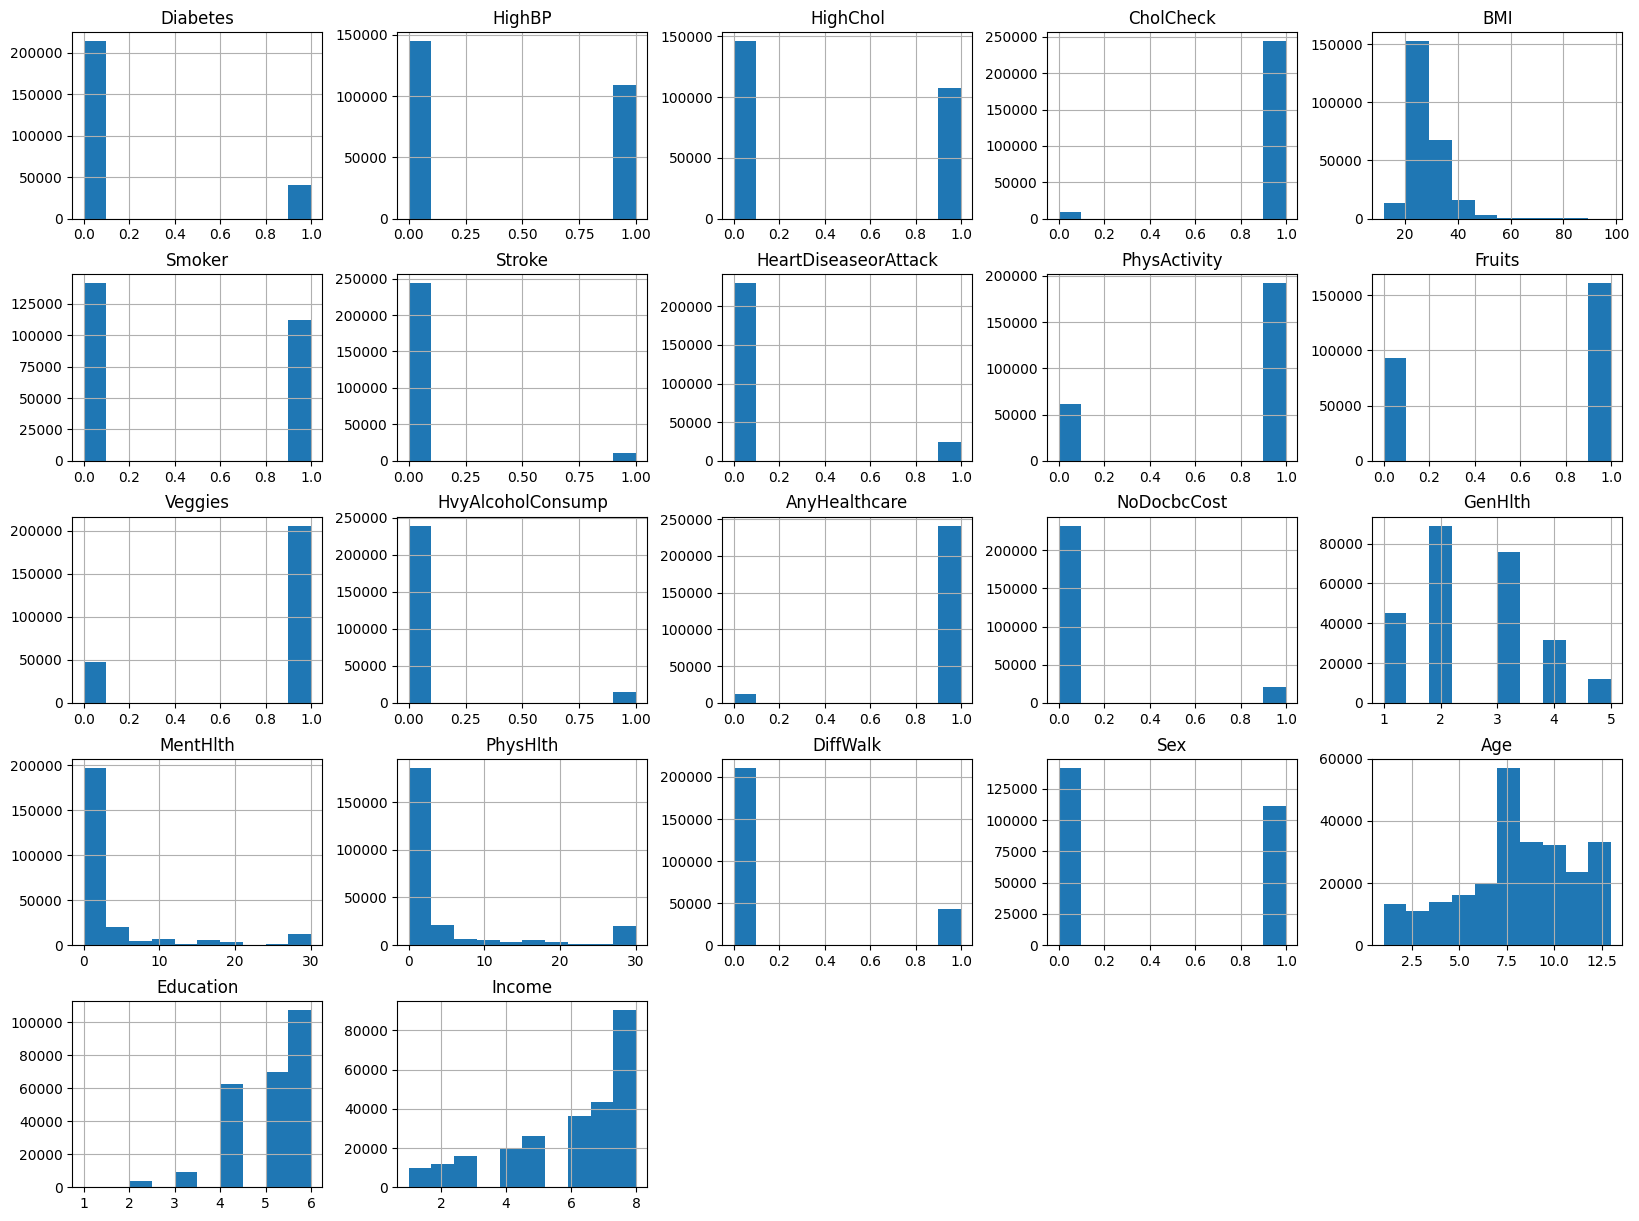

In [14]:
df.hist(figsize=[20,15])
plt.show()

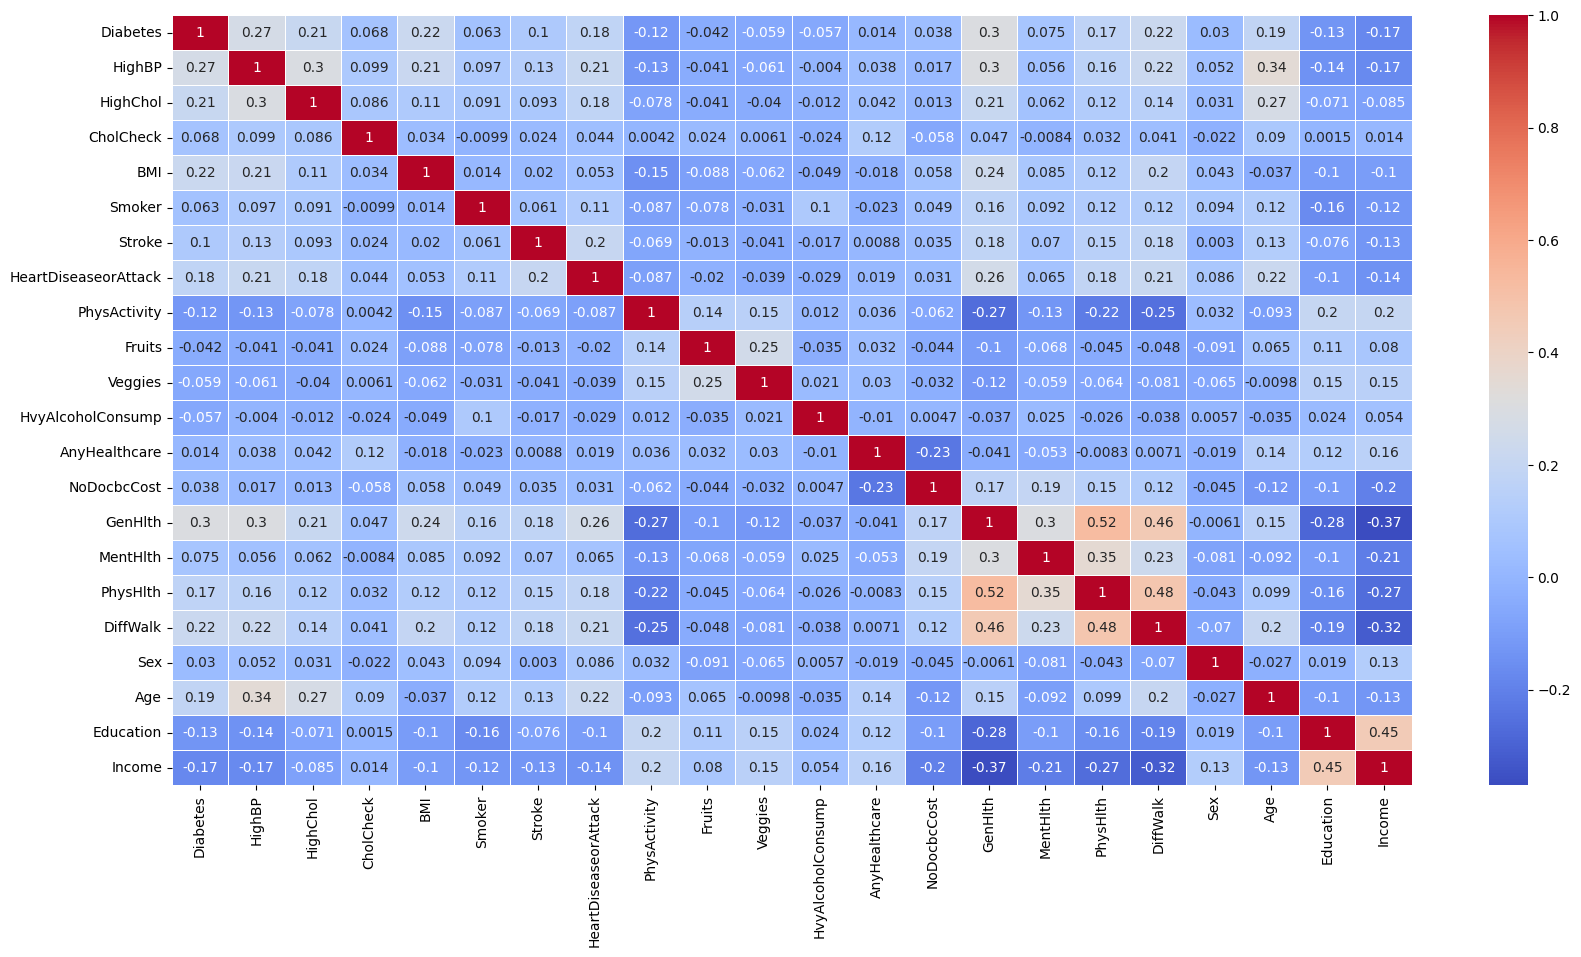

In [15]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), linewidths=.5, annot=True, cmap='coolwarm')
plt.show()

We can see from heatmap above that:
1. PhysHlth has moderate positive correlation with GenHlth
2. PhysHlth has moderate positive correlation with DiffWalk
3. GenHlth has moderate positive correlation with DiffWalk
4. All of the feature above have low correlation with our target variable, which is Diabetes


Distritbution of BMI

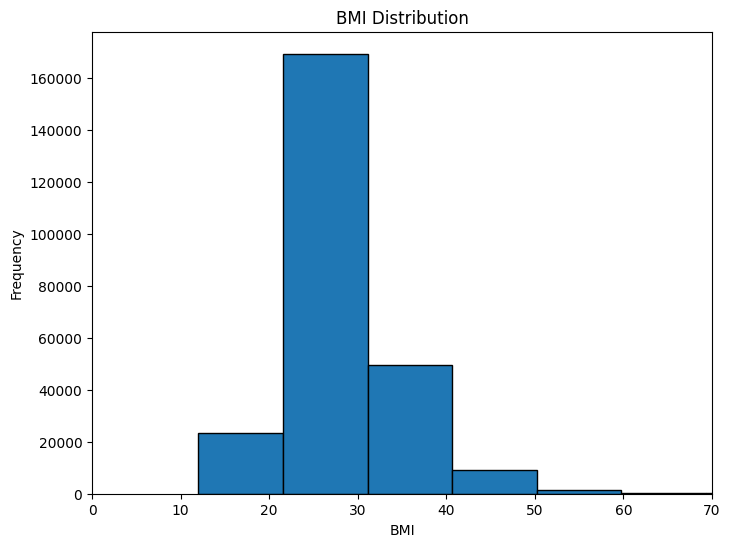

In [16]:
plt.figure(figsize=[8,6])
plt.hist(df['BMI'], bins = 9,edgecolor='black')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.xlim(0, 70)
plt.ylabel('Frequency')
plt.show()

Distribution is close to normal distribution, which is good for modeling and interpretation of statistical methods. We can see another distribution in our df.hist

Count plot for diabetes

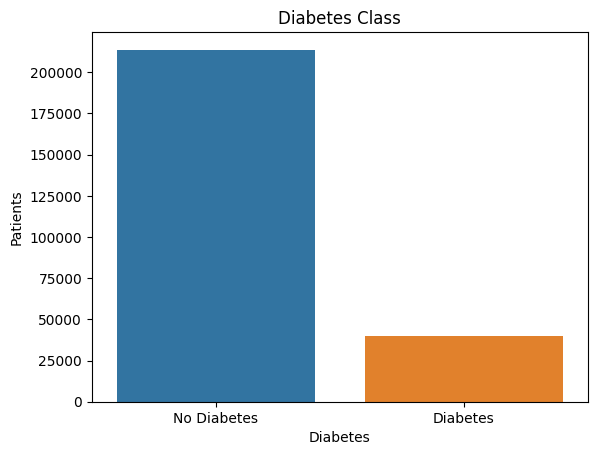

In [17]:
sns.countplot(x = 'Diabetes', data = df)
plt.title('Diabetes Class')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.ylabel('Patients')
plt.show()

Target Variable Class is imbalanced

Count plots for categorical variable and bar plots for numerical variable

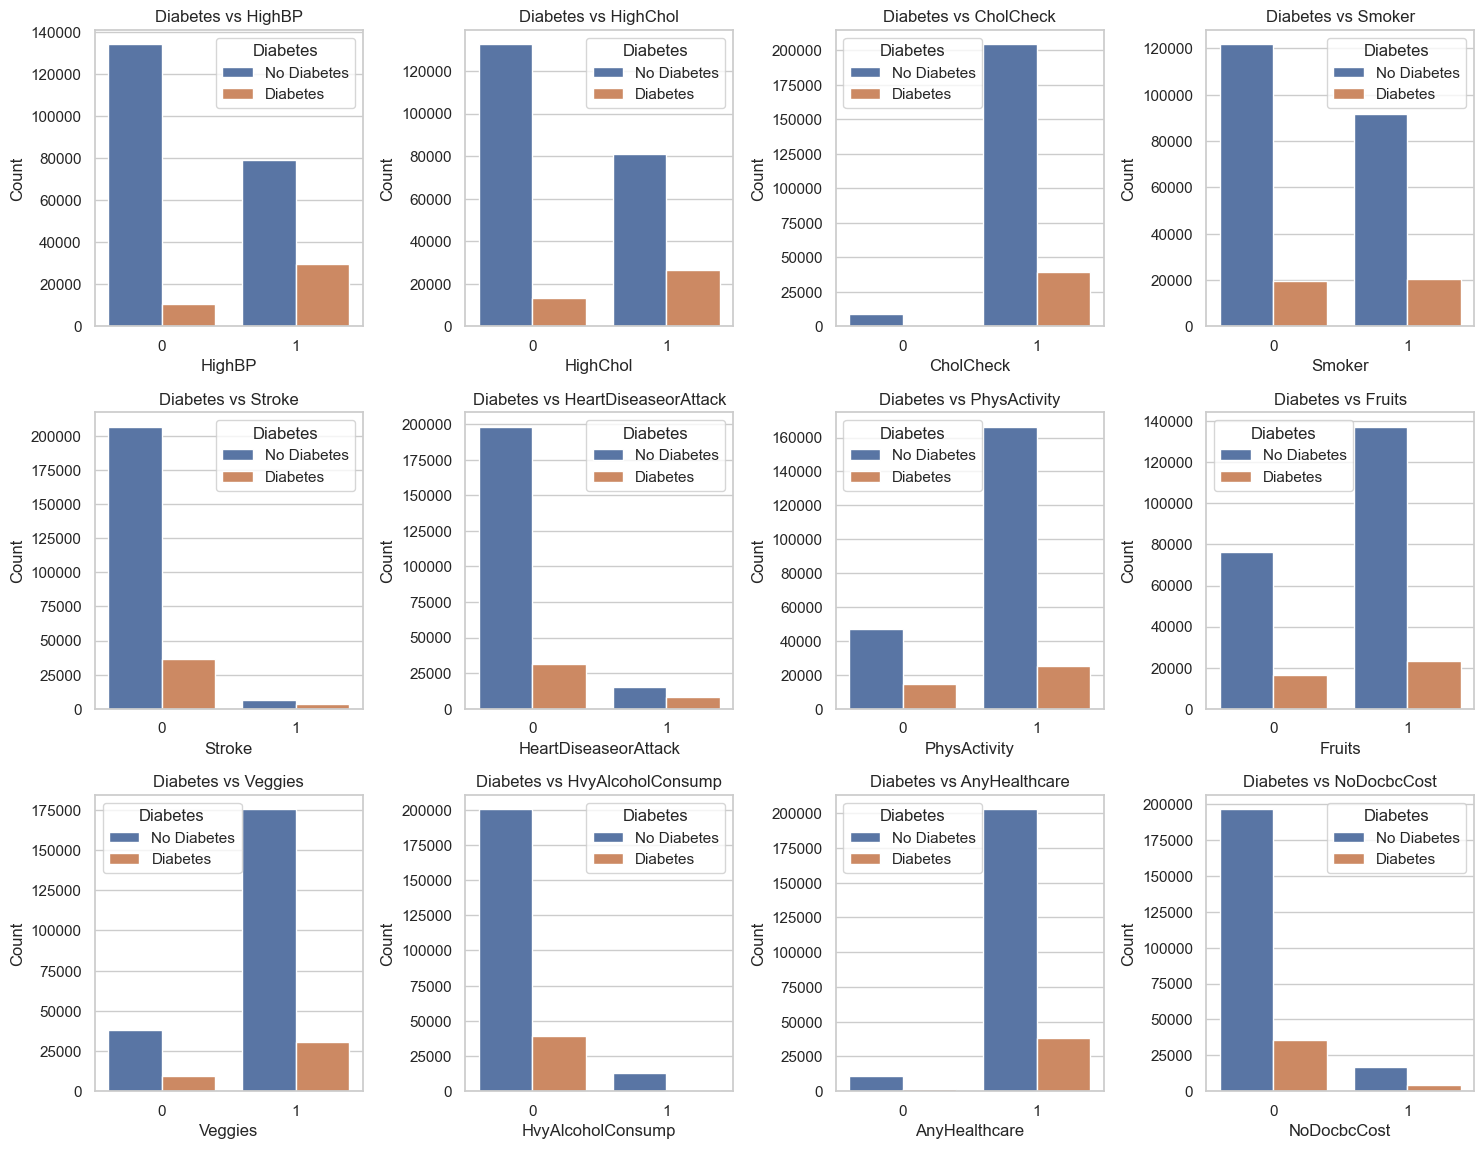

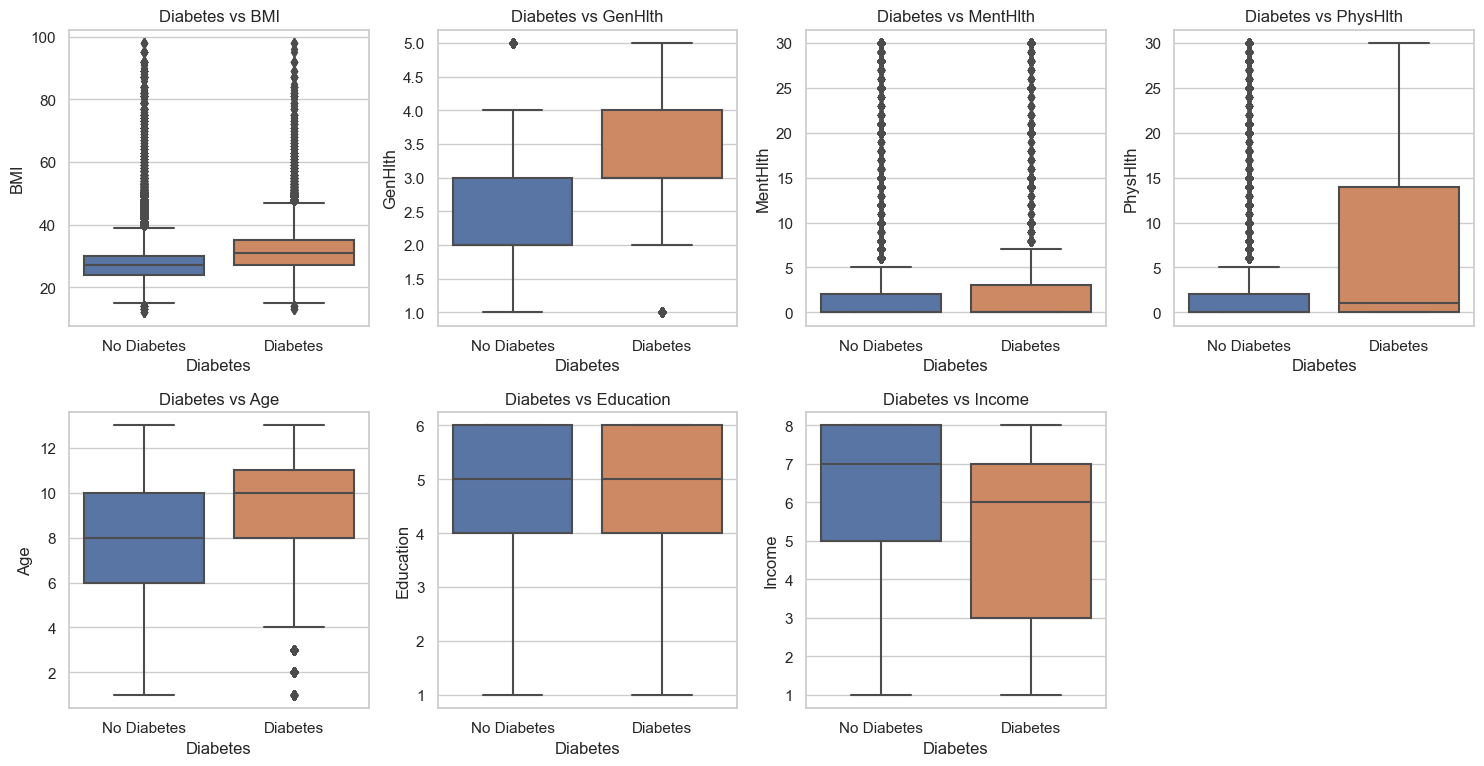

In [18]:
sns.set(style="whitegrid")

# Plot bar plots for categorical variables
categorical_var = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
                    'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost']
plt.figure(figsize=(15, 15))
for i, var in enumerate(categorical_var, 1):
    plt.subplot(4, 4, i)
    sns.countplot(x=var, hue='Diabetes', data=df)
    plt.title(f'Diabetes vs {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.legend(title='Diabetes', labels=['No Diabetes', 'Diabetes'])
plt.tight_layout()
plt.show()

# Plot box plots for numerical variables
numerical_var = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']
plt.figure(figsize=(15, 15))
for i, var in enumerate(numerical_var, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x='Diabetes', y=var, data=df)
    plt.title(f'Diabetes vs {var}')
    plt.xlabel('Diabetes')
    plt.ylabel(var)
    plt.xticks([0,1],['No Diabetes', 'Diabetes'])
plt.tight_layout()
plt.show()

## 6. Feature Selection Techniques

In [19]:
input_df=df.drop('Diabetes',axis=1)
output_df=df['Diabetes']

### Pearson Correlation Coefficients

In [20]:
from scipy import stats

correlations = input_df.corrwith(output_df)
cor_df = pd.DataFrame(correlations, columns=['Pearson_corr'])
cor_df.sort_values(by='Pearson_corr',ascending=False)

,Pearson_corr
GenHlth,0.300785
HighBP,0.270334
BMI,0.223851
DiffWalk,0.222155
HighChol,0.210290
Age,0.185891
HeartDiseaseorAttack,0.176933
PhysHlth,0.174948
Stroke,0.104800
MentHlth,0.074971


Check P-value for each feature

If p-value > 0.5 then drop the feature

In [21]:
from scipy import stats
import pandas as pd

correlations = []
pvalues = []

for col in input_df:
    r, p = stats.pearsonr(input_df[col], output_df)
    correlations.append(r) 
    pvalues.append(p)

data = {'Feature' :input_df.columns,'correlations': correlations,'p-values': pvalues}
p_value_df = pd.DataFrame(data)
p_value_df.sort_values(by='correlations',ascending=False)

,Feature,correlations,p-values
13,GenHlth,0.300785,0.000000e+00
0,HighBP,0.270334,0.000000e+00
3,BMI,0.223851,0.000000e+00
16,DiffWalk,0.222155,0.000000e+00
1,HighChol,0.210290,0.000000e+00
18,Age,0.185891,0.000000e+00
6,HeartDiseaseorAttack,0.176933,0.000000e+00
15,PhysHlth,0.174948,0.000000e+00
5,Stroke,0.104800,0.000000e+00
14,MentHlth,0.074971,6.852185e-313


Based on our pearson correlation calculation, all p-value for each feature is less than 0.5, so nothing will be dropped

### Chi Squared

In [22]:
from sklearn.feature_selection import chi2

chi, p = chi2(input_df, output_df)
chi_df = pd.DataFrame(chi, index=input_df.columns) 
chi_df.columns = ['Score']
chi_df.sort_values(by='Score',ascending=False)

,Score
PhysHlth,139108.716691
MentHlth,24601.500440
BMI,19560.690483
HighBP,10585.790180
GenHlth,10433.067217
DiffWalk,10413.686810
Age,10180.585970
HeartDiseaseorAttack,7193.573093
HighChol,6460.310201
Income,5366.985070


Based on our chi squared test, we will drop variables that have <b>Veggies, Fruits, Sex, CholCheck,</b> and <b>AnyHealthcare</b> because they have small chi squared value

In [23]:
df = df.drop(['Veggies','Fruits','Sex','CholCheck','AnyHealthcare'],axis=1)

## 7. Data Preprocessing

In [24]:
# There is no continuous variables in our data because it is already categorized into classes

In [25]:
input_df=df.drop('Diabetes',axis=1)
output_df=df['Diabetes']

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size = 0.2, random_state = 0)

### Display overview of our training set and testing set

In [27]:
x_train.head()

,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Education,Income
160780,0,0,26,1,0,0,1,0,0,2,1,0,0,7,5,7
249661,0,0,31,0,0,0,0,0,1,3,10,0,0,3,5,6
26769,0,0,24,0,0,0,1,0,0,1,0,0,0,6,6,8
182771,1,0,24,1,0,0,0,0,0,3,0,10,1,13,4,7
117116,1,1,28,0,0,0,1,0,0,3,0,0,0,2,5,5


In [28]:
x_test.head()

,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Education,Income
198433,0,0,45,1,0,0,1,0,0,1,0,3,0,4,5,1
162094,0,0,24,1,0,0,0,0,0,1,0,0,0,11,4,8
81877,0,0,21,1,0,0,1,0,0,3,0,0,0,9,4,7
137629,1,1,31,0,0,0,1,0,0,3,0,0,0,6,6,7
138898,1,1,34,1,0,0,1,0,0,1,0,0,0,11,4,6


In [29]:
y_train

160780    1
249661    0
26769     0
182771    0
117116    0
         ..
176963    0
117952    0
173685    0
43567     0
199340    1
Name: Diabetes, Length: 202944, dtype: int64

In [30]:
y_train.value_counts()

0    171086
1     31858
Name: Diabetes, dtype: int64

In [31]:
y_test

198433    0
162094    0
81877     0
137629    0
138898    1
         ..
22855     0
121922    0
232355    0
208496    1
232431    0
Name: Diabetes, Length: 50736, dtype: int64

In [32]:
y_test.value_counts()

0    42617
1     8119
Name: Diabetes, dtype: int64

In [33]:
# As we can see the data is not balance, so we have to make our data balanced if we don't want to have bias

## 8. Handling Imbalance Data

In [34]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
x_train_resampled, y_train_resampled = os.fit_resample(x_train, y_train)

In [35]:
x_train_resampled

,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Education,Income
0,0,0,26,1,0,0,1,0,0,2,1,0,0,7,5,7
1,0,0,31,0,0,0,0,0,1,3,10,0,0,3,5,6
2,0,0,24,0,0,0,1,0,0,1,0,0,0,6,6,8
3,1,0,24,1,0,0,0,0,0,3,0,10,1,13,4,7
4,1,1,28,0,0,0,1,0,0,3,0,0,0,2,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342167,1,0,39,1,0,0,1,0,0,3,14,7,0,5,3,4
342168,1,0,34,1,0,0,0,0,0,2,0,0,0,9,6,8
342169,1,0,43,1,0,1,0,0,0,4,0,3,0,9,4,4
342170,1,1,16,0,0,0,1,0,0,4,0,30,1,10,3,2


In [36]:
y_train_resampled.value_counts()

1    171086
0    171086
Name: Diabetes, dtype: int64

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x_train_resampled, y_train_resampled, test_size = 0.2, random_state = 0)

In [38]:
y_train.value_counts()

0    136904
1    136833
Name: Diabetes, dtype: int64

In [39]:
y_test.value_counts()

1    34253
0    34182
Name: Diabetes, dtype: int64

In [39]:
# As we can see there is no more bias in our test and train model

## 9. Choose the suitable model

##### Because this is a diabetes prediction, our target is to minimize false negative, so our primary objectives is to find a model with high <b>Recall</b>

### a. Binary Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix

#Define the model
logReg_model = LogisticRegression(random_state=0)

In [41]:
#Training using Cross Validation Approach
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

scores = cross_val_score(logReg_model, x_train, y_train, cv=5,scoring='accuracy')
print('accuracy of test set for each fold: ',scores)

accuracy of test set for each fold:  [0.73045591 0.73149704 0.7315104  0.7314556  0.73446947]


In [42]:
logReg_model.fit(x_train,y_train)
y_predict=logReg_model.predict(x_test)

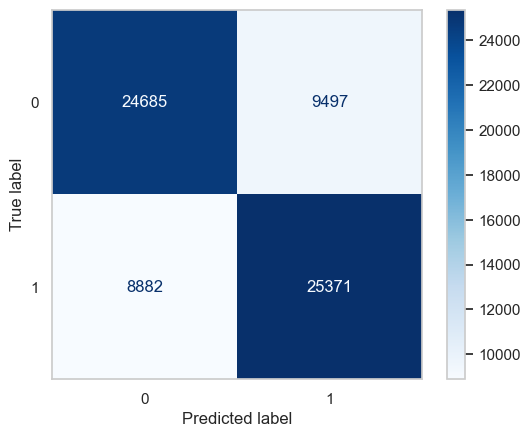

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_predict,labels=logReg_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=logReg_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

In [44]:
print('\nClassification Report\n')
print(classification_report(y_test, y_predict, target_names=['0', '1']))


Classification Report

              precision    recall  f1-score   support

           0       0.74      0.72      0.73     34182
           1       0.73      0.74      0.73     34253

    accuracy                           0.73     68435
   macro avg       0.73      0.73      0.73     68435
weighted avg       0.73      0.73      0.73     68435



Because our target variable class distribution is balanced and we want to evaluate the model's performance equally across all classes, so we will use macro average for recall, precision, and f1-score.

### b. Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

DT_class = DecisionTreeClassifier(random_state=0)
DT_class.fit(x_train, y_train)
y_predict=DT_class.predict(x_test)

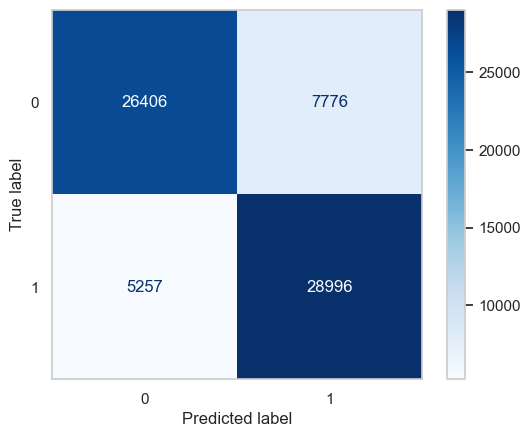

In [46]:
cm = confusion_matrix(y_test, y_predict,labels=logReg_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=DT_class.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

In [47]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))
from sklearn.metrics import accuracy_score, precision_score, recall_score

              precision    recall  f1-score   support

           0       0.83      0.77      0.80     34182
           1       0.79      0.85      0.82     34253

    accuracy                           0.81     68435
   macro avg       0.81      0.81      0.81     68435
weighted avg       0.81      0.81      0.81     68435



#### Tuning parameters

In [48]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_depth':[2,4,6,8], 
}

In [49]:
DT_class2 = DecisionTreeClassifier(random_state=0)
DT_class2= GridSearchCV(DT_class2 ,
                            param_grid = parameters,   # hyperparameters
                            scoring='accuracy',        # metric for scoring
                            cv=5)  

In [50]:
DT_class2.fit(x_train,y_train)
print("Tuned Hyperparameters :", DT_class2.best_params_)
print("Accuracy :",DT_class2.best_score_)

Tuned Hyperparameters : {'criterion': 'gini', 'max_depth': 8}
Accuracy : 0.7288748066153957


In [51]:
#Train the data using based parameter
DT_class_best = DecisionTreeClassifier(criterion= 'gini',max_depth=8)

In [52]:
DT_class_best.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8)

In [53]:
y_predict_best=DT_class_best.predict(x_test)

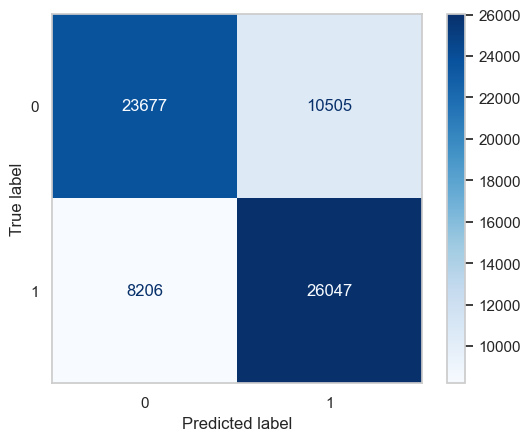

In [54]:
cm = confusion_matrix(y_test, y_predict_best,labels=logReg_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=DT_class_best.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

In [55]:
print('\nClassification Report\n')
print(classification_report(y_test, y_predict_best, target_names=['0','1']))


Classification Report

              precision    recall  f1-score   support

           0       0.74      0.69      0.72     34182
           1       0.71      0.76      0.74     34253

    accuracy                           0.73     68435
   macro avg       0.73      0.73      0.73     68435
weighted avg       0.73      0.73      0.73     68435



The result before we tuning the parameter is better than after tuning hyperparameters using GridSearchCV. Therefore, we will take the model before tuning

### c. Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

RF_class = RandomForestClassifier(n_estimators=100,criterion= 'gini')
RF_class.fit(x_train, y_train)


RandomForestClassifier()

In [57]:
y_predict=RF_class.predict(x_test)

In [58]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_predict))


Classification Report

              precision    recall  f1-score   support

           0       0.88      0.80      0.84     34182
           1       0.82      0.89      0.85     34253

    accuracy                           0.85     68435
   macro avg       0.85      0.85      0.85     68435
weighted avg       0.85      0.85      0.85     68435



### d. K Nearest Neighbor

In [59]:
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

# Choose value of K
KNN_class = KNeighborsClassifier( n_neighbors=3, weights='uniform')
KNN_class.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [60]:
y_predict=KNN_class.predict(x_test)

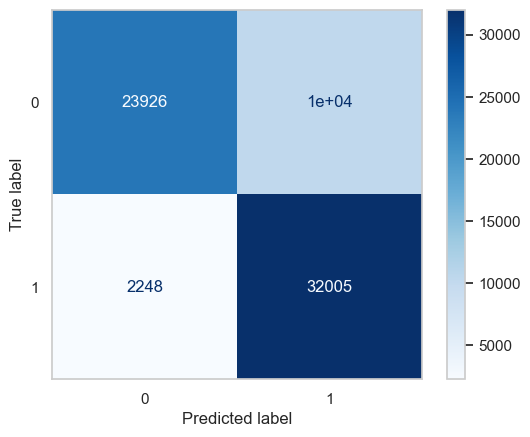

In [61]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_predict,labels=logReg_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=KNN_class.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

In [62]:
print('\nClassification Report\n')
print(classification_report(y_test, y_predict, target_names=['0','1']))


Classification Report

              precision    recall  f1-score   support

           0       0.91      0.70      0.79     34182
           1       0.76      0.93      0.84     34253

    accuracy                           0.82     68435
   macro avg       0.84      0.82      0.81     68435
weighted avg       0.84      0.82      0.81     68435



##### Important information:
We can see that in class 1 or positive class, we have 93% recall which is pretty high value and it is really good for minimizing false negative in positive class.

#### Tuning Parameter

Because it will take longer than 50 minutes to train all of our sample dataset, so we will take a little sample from our dataset

In [77]:
x_train1 = x_train[:50000]
y_train1 = y_train[:50000]

In [78]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_neighbors':[5,7],
    'weights':['uniform','distance'], 
}

In [79]:
KNN_class2 = KNeighborsClassifier()
KNN_class2= GridSearchCV(KNN_class2 ,
                            param_grid = parameters,   # hyperparameters
                            scoring='accuracy',        # metric for scoring
                            cv=5)  

In [81]:
KNN_class2.fit(x_train1,y_train1)
print("Tuned Hyperparameters :", KNN_class2.best_params_)
print("Accuracy :",KNN_class2.best_score_)

Tuned Hyperparameters : {'n_neighbors': 5, 'weights': 'distance'}
Accuracy : 0.7804800000000001


In [83]:
#Train the data using based parameter
KNN_class_best = KNeighborsClassifier(n_neighbors= 5, weights='distance')

In [84]:
KNN_class_best.fit(x_train1,y_train1)

KNeighborsClassifier(weights='distance')

In [85]:
y_predict_best=KNN_class_best.predict(x_test)

In [86]:
print('\nClassification Report\n')
print(classification_report(y_test, y_predict_best, target_names=['0','1']))


Classification Report

              precision    recall  f1-score   support

           0       0.88      0.67      0.76     34182
           1       0.74      0.91      0.81     34253

    accuracy                           0.79     68435
   macro avg       0.81      0.79      0.79     68435
weighted avg       0.81      0.79      0.79     68435



Because our KNN metrics after tuning is lower than before tuning, so we will take the KNN model before tuning

### e. Naive Bayes

In [87]:
from sklearn.naive_bayes import BernoulliNB
import warnings
warnings.filterwarnings('ignore')

NB_class = BernoulliNB()
NB_class.fit(x_train, y_train)

BernoulliNB()

In [88]:
y_predict=NB_class.predict(x_test)

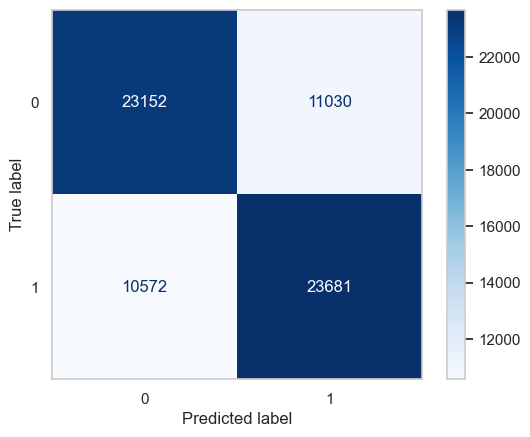

In [89]:
cm = confusion_matrix(y_test, y_predict,labels=logReg_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=NB_class.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

In [90]:
print('\nClassification Report\n')
print(classification_report(y_test, y_predict, target_names=['0','1']))


Classification Report

              precision    recall  f1-score   support

           0       0.69      0.68      0.68     34182
           1       0.68      0.69      0.69     34253

    accuracy                           0.68     68435
   macro avg       0.68      0.68      0.68     68435
weighted avg       0.68      0.68      0.68     68435



### f. Support Vector Machines

We will only take 50000 sample of our dataset because it will take more than 40 minutes to train all of our records in our dataset.

In [40]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

SVM_class = make_pipeline(SVC(gamma='auto'))
SVM_class.fit(x_train[:50000], y_train[:50000])

Pipeline(steps=[('svc', SVC(gamma='auto'))])

In [41]:
y_predict=SVM_class.predict(x_test)

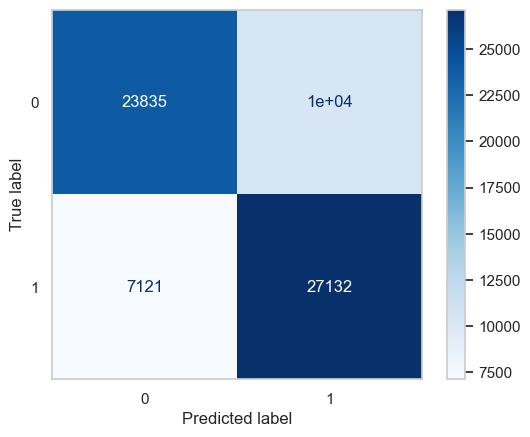

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_predict,labels=SVM_class.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=SVM_class.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

In [45]:
print('\nClassification Report\n')
print(classification_report(y_test, y_predict, target_names=['0','1']))


Classification Report

              precision    recall  f1-score   support

           0       0.77      0.70      0.73     34182
           1       0.72      0.79      0.76     34253

    accuracy                           0.74     68435
   macro avg       0.75      0.74      0.74     68435
weighted avg       0.75      0.74      0.74     68435



## 10. Performance metrics comparisons

#### Our performance metrics table for all our models:

In [51]:
model = ["Binary Logistic Regression","Decision Tree","Random Forest","K Nearest Neighbor","Naive Bayes","Support Vector Machines"]
recall = [0.73,0.81,0.85,0.82,0.68,0.74]
precision = [0.73,0.81,0.85,0.84,0.68,0.75]
f1score = [0.73,0.81,0.85,0.81,0.68,0.74]
accuracy = [0.73,0.81,0.85,0.82,0.68,0.74]

performance_df = pd.DataFrame({"Model":model,"Recall avg":recall,"Precision avg":precision,"F1 Score avg":f1score,"Accuracy avg":accuracy})
performance_df

,Model,Recall avg,Precision avg,F1 Score avg,Accuracy avg
0,Binary Logistic Regression,0.73,0.73,0.73,0.73
1,Decision Tree,0.81,0.81,0.81,0.81
2,Random Forest,0.85,0.85,0.85,0.85
3,K Nearest Neighbor,0.82,0.84,0.81,0.82
4,Naive Bayes,0.68,0.68,0.68,0.68
5,Support Vector Machines,0.74,0.75,0.74,0.74


#### Our recall table for all our models in each class:

In [53]:
recall_0 = [0.72,0.77,0.80,0.70,0.68,0.70]
recall_1 = [0.74,0.85,0.89,0.93,0.69,0.79]

recall_df = pd.DataFrame({"Model":model,"Recall Class 0 (Negative)":recall_0,"Recall Class 1 (Positive)":recall_1})
recall_df

,Model,Recall Class 0 (Negative),Recall Class 1 (Positive)
0,Binary Logistic Regression,0.72,0.74
1,Decision Tree,0.77,0.85
2,Random Forest,0.80,0.89
3,K Nearest Neighbor,0.70,0.93
4,Naive Bayes,0.68,0.69
5,Support Vector Machines,0.70,0.79


## 11. Final Decision

##### To choose which model is suitable, we have to know that our goal is to predict which patient has a diabetes, so we can cure them immediately. Therefore, we have to avoid: wrongly classify patient that have diabetes as not diabetes. So, we need to focus on our Recall

##### Based on our evaluation of 5 models, we will take <b>K Nearest Neighbor</b>, because it has great recall for positive class which is 93% and a good F1 score average (81%), recall average (82%) and accuracy (81%). So, there is a very little probability that we missclasified our patients that actually have diabetes as not diabetes